# Convolutional Neural Network

### Importing the libraries

In [33]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np
import random as rn

In [2]:
tf.__version__

'2.8.0'

## Part 1 - Data Preprocessing

### Preprocessing the Training and Test set

In [86]:
# len(train_dataset)

3680

In [238]:
batch_size = 32
train_datagen = ImageDataGenerator(rescale=1./255,
                                   # shear_range = 0.2,
                                   # zoom_range = 0.2,
                                   # horizontal_flip = True,
                                   validation_split=0.2)
test_datagen = ImageDataGenerator(rescale=1./255,
                                  validation_split=0.2)
train_dataset = train_datagen.flow_from_directory('archive/flowers',
                                                  target_size=(150, 150),
                                                  batch_size=batch_size,
                                                  class_mode='categorical',
                                                  shuffle=True,
                                                  seed=42,
                                                  subset='training')
test_dataset = test_datagen.flow_from_directory('archive/flowers',
                                                target_size=(150, 150),
                                                batch_size=batch_size,
                                                class_mode='categorical',
                                                shuffle=True,
                                                seed=42,
                                                subset='validation')

Found 3457 images belonging to 5 classes.
Found 860 images belonging to 5 classes.


In [239]:
train_aug_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True,
                                   validation_split=0.2)
train_aug_dataset = train_aug_datagen.flow_from_directory('archive/flowers',
                                                  target_size=(150, 150),
                                                  batch_size=batch_size,
                                                  class_mode='categorical',
                                                  shuffle=True,
                                                  seed=42,
                                                  subset='training')

Found 3457 images belonging to 5 classes.


In [242]:
len(zip(train_dataset,train_aug_dataset))

TypeError: object of type 'zip' has no len()

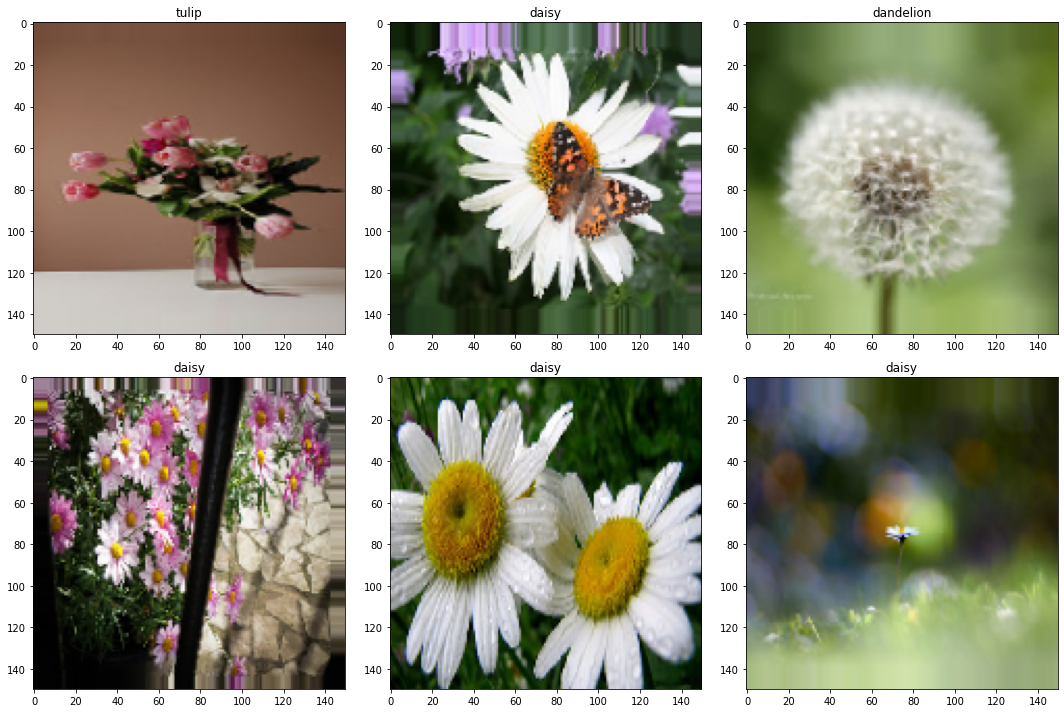

In [215]:
fig,ax=plt.subplots(2,3)
fig.set_size_inches(15,10)
img,y = train_dataset.next()
for i in range(2):
    for j in range (3):
        l=rn.randint(0,31)
        label = list(train_dataset.class_indices.keys())[np.argmax(y[l])]
        ax[i,j].imshow(img[l])
        ax[i,j].set_title(label)

plt.tight_layout()

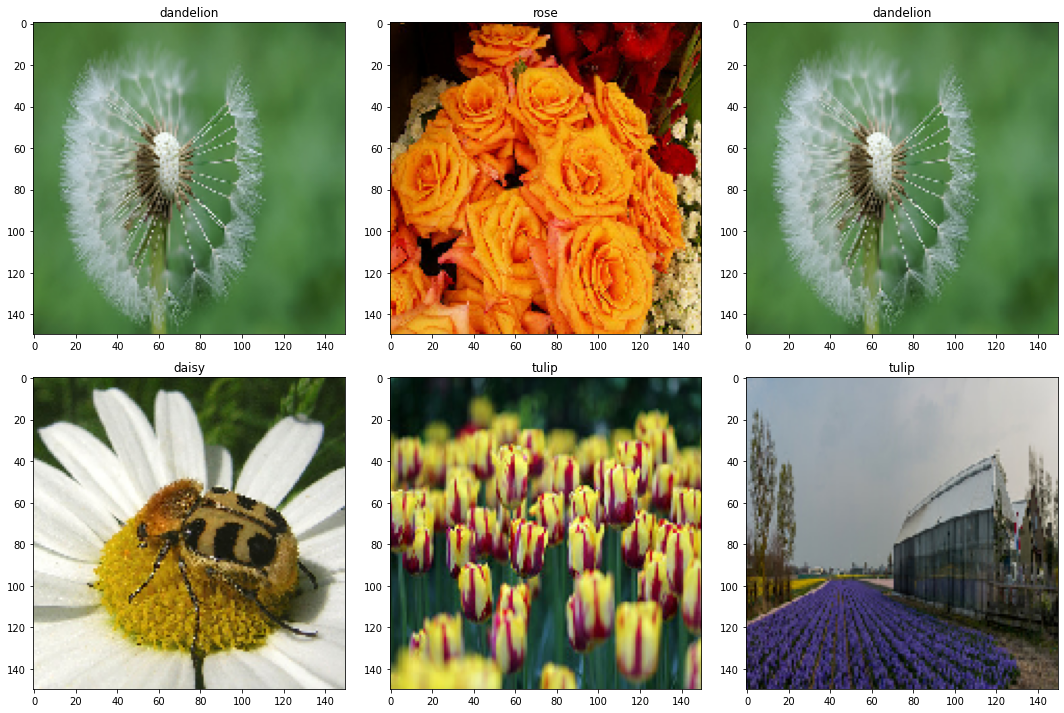

In [216]:
fig,ax=plt.subplots(2,3)
fig.set_size_inches(15,10)
img,y = test_dataset.next()
for i in range(2):
    for j in range (3):
        l=rn.randint(0,31)
        label = list(test_dataset.class_indices.keys())[np.argmax(y[l])]
        ax[i,j].imshow(img[l])
        ax[i,j].set_title(label)

plt.tight_layout()


## Part 2 - Building the CNN

### Initialising the CNN

In [217]:
cnn = tf.keras.models.Sequential()

### Step 1 - Convolution

In [218]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[150, 150, 3]))

### Step 2 - Pooling

In [219]:
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

### Adding a second convolutional layer

In [220]:
cnn.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
cnn.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
cnn.add(tf.keras.layers.Conv2D(filters=96, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

### Step 3 - Flattening

In [221]:
cnn.add(tf.keras.layers.Flatten())

### Step 4 - Full Connection

In [222]:
# cnn.add(tf.keras.layers.Dense(units=2048, activation='relu'))
cnn.add(tf.keras.layers.Dense(units=512, activation='relu'))

### Step 5 - Output Layer

In [223]:
cnn.add(tf.keras.layers.Dense(units=5, activation='softmax'))

## Part 3 - Training the CNN

### Compiling the CNN

In [224]:
cnn.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [225]:
cnn.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_27 (Conv2D)          (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_27 (MaxPoolin  (None, 74, 74, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_28 (Conv2D)          (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_28 (MaxPoolin  (None, 36, 36, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_29 (Conv2D)          (None, 34, 34, 64)        36928     
                                                                 
 max_pooling2d_29 (MaxPoolin  (None, 17, 17, 64)      

### Training the CNN on the Training set and evaluating it on the Test set

In [226]:
history = cnn.fit(
    train_dataset,
    steps_per_epoch=len(train_dataset),
    epochs=15,
    validation_data=test_dataset,
    validation_steps=len(test_dataset))
# cnn.fit(x = training_set, validation_data = test_set, epochs = 25)

Epoch 1/15
109/109 [==============================] - 155s 1s/step - loss: 1.2954 - accuracy: 0.4388 - val_loss: 1.2120 - val_accuracy: 0.4872

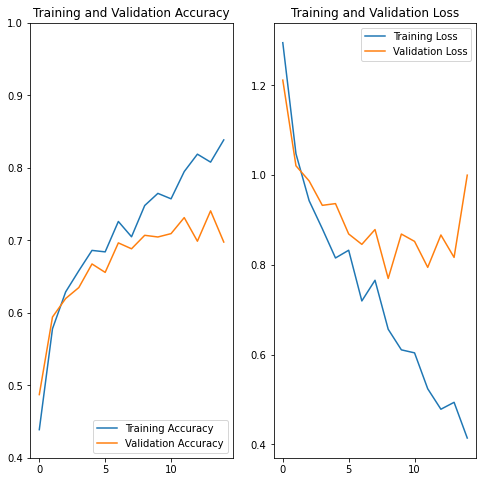

In [228]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(15)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylim(0.4,1.0)
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

## Part 4 - Making a single prediction

In [235]:
import numpy as np
from keras.preprocessing import image
test_image1 = image.load_img('archive/pred/pred5.jpg', target_size = (150, 150))
test_image = image.img_to_array(test_image1)
test_image = np.expand_dims(test_image, axis = 0)
result = cnn.predict(test_image)
# training_set.class_indices
# if result[0][0] == 1:
#   prediction = 'dog'
# else:
#   prediction = 'cat'

In [236]:
print(result)

[[1. 0. 0. 0. 0.]]


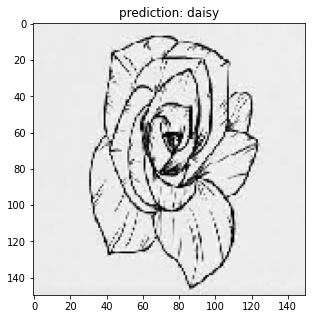

In [237]:
fig,ax=plt.subplots(1,1)
fig.set_size_inches(5,5)
label = list(test_dataset.class_indices.keys())[np.argmax(result)]
ax.imshow(test_image1)
ax.set_title('prediction: '+label)
plt.show()